# Proyecto - Telecomunicaciones CHURN Analisis

### (1) Recolección de Datos

#### (1.1) Importamos las librerias necesarias y el Data Frame CHURN

In [1]:
# Librerias
import numpy as np              # Algebra Lineal
import pandas as pd             # Procesamiento de datos
import matplotlib.pyplot as plt # Visualización
import seaborn as sns           # Visualización

# Importamos la base de datos Telco-Churn
dfChurn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', sep = ',')

#### (1.2) Imprimimos los 5 primeros datos del Data Frame

In [2]:
dfChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### (2) Pre-Procesamiento

#### (2.1) Vista General del Data Frame

In [3]:
print ("Data Frame CHURN\n (Filas, Columnas)  : " ,dfChurn.shape)
print ("\nVariables  :\n" ,dfChurn.columns.tolist())
print ("\nValores Perdidos  :  ", dfChurn.isnull().sum().values.sum())
print ("\nValores Unicos  :  \n",dfChurn.nunique())

Data Frame CHURN
 (Filas, Columnas)  :  (7043, 21)

Variables  :
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Valores Perdidos  :   0

Valores Unicos  :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


#### (2.2) Limpieza de Datos

In [4]:
# Haremos los siguientes cambios para la variable "TotalCharges"
# Remplazo de Cadenas Vacias por NaNs
dfChurn['TotalCharges'] = dfChurn["TotalCharges"].replace(" ",np.nan)
# Quitamos los NaNs del Data Frame
dfChurn = dfChurn[dfChurn["TotalCharges"].notnull()]
dfChurn = dfChurn.reset_index()[dfChurn.columns]
# Convertimos la variable a tipo float
dfChurn["TotalCharges"] = dfChurn["TotalCharges"].astype(float)

# En la variable "SeniorCitizen" hacemos una recodificación de la variable
dfChurn["SeniorCitizen"] = dfChurn["SeniorCitizen"].replace({1:"Yes",0:"No"})

# Generamos una funcion para codificar de manera categorica la variable "Tenure"
def tenure_cat(dfChurn) :    
    if dfChurn["tenure"] <= 12 :
        return "(0-12)"
    elif (dfChurn["tenure"] > 12) & (dfChurn["tenure"] <= 24 ):
        return "(12-24)"
    elif (dfChurn["tenure"] > 24) & (dfChurn["tenure"] <= 48) :
        return "(24-48)"
    elif (dfChurn["tenure"] > 48) & (dfChurn["tenure"] <= 60) :
        return "(48-60)"
    elif dfChurn["tenure"] > 60 :
        return "(+60)"
# Creamos la variable "tenure_cat" usando la función de que codifica la data de la variable "tenure"
dfChurn["tenure_cat"] = dfChurn.apply(lambda dfChurn:tenure_cat(dfChurn),
                                      axis = 1)

# Remplazamos la etiqueta "No internet service" por "No" para las siguientes variables
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    dfChurn[i]  = dfChurn[i].replace({'No internet service' : 'No'})

### (3) Extracción de Caracteristicas

#### (3.1) Analisis Exploratorio - Variables Categoricas ___(NoChurn, Churn, Total)___
Graficaremos cada un de las variables categoricas cortada por No Churn vs Churn vs Total de la base

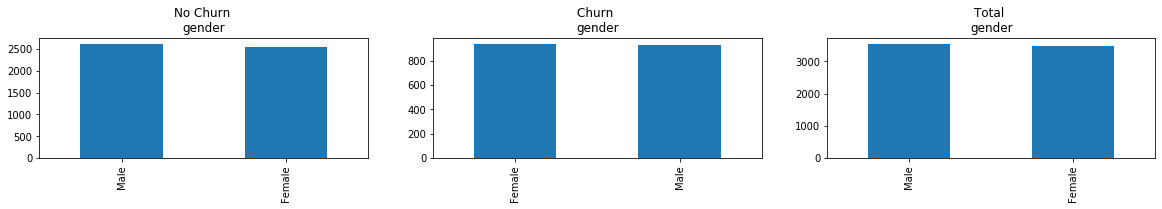

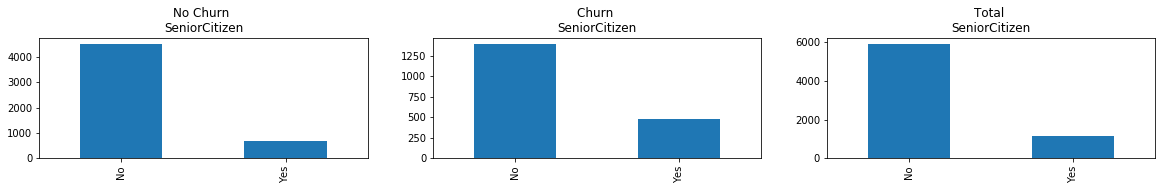

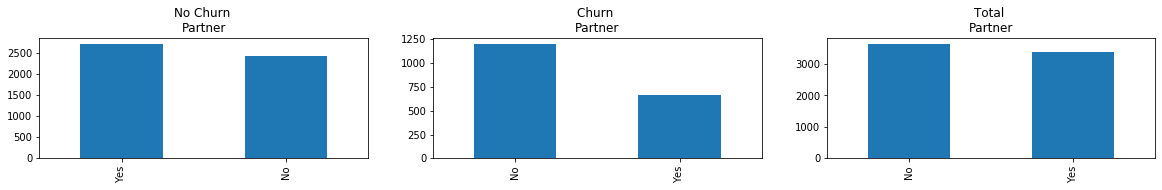

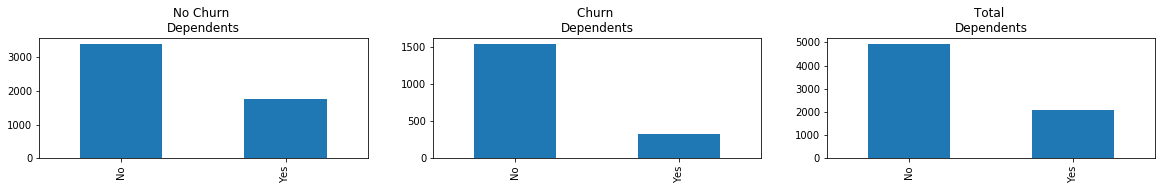

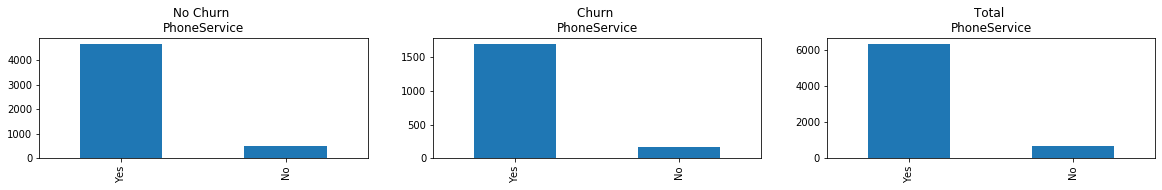

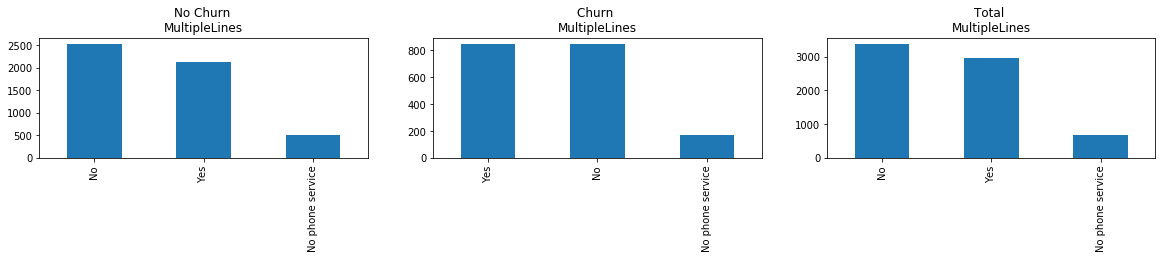

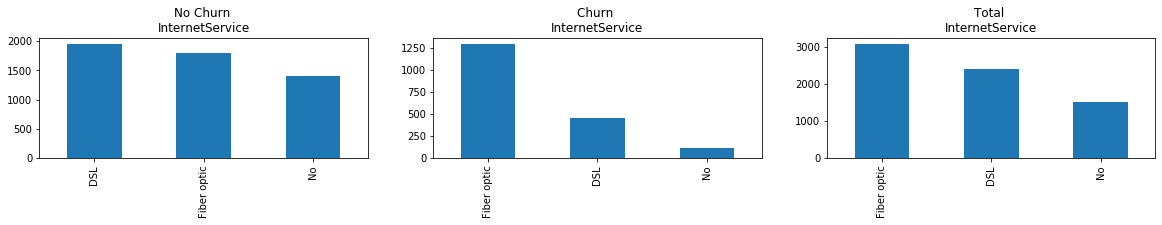

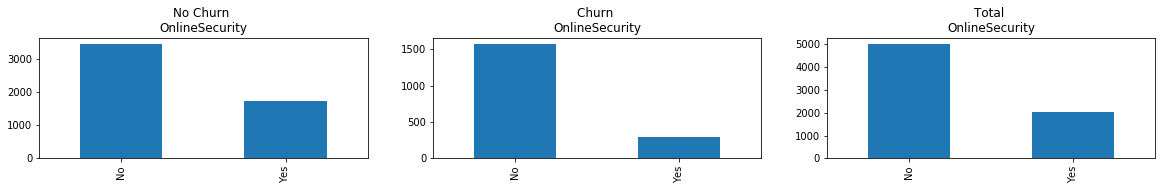

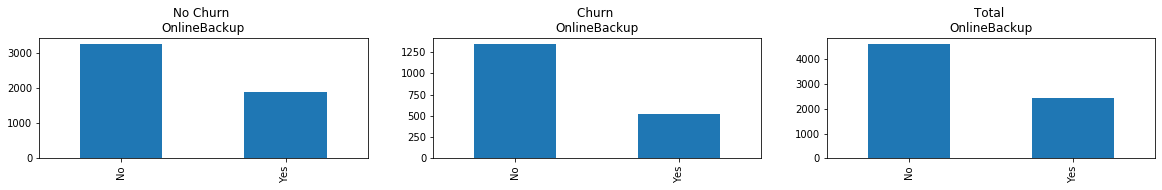

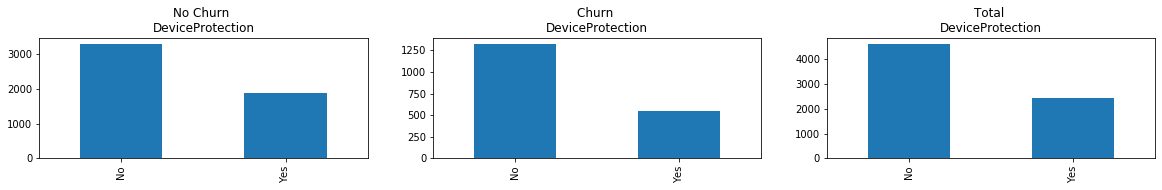

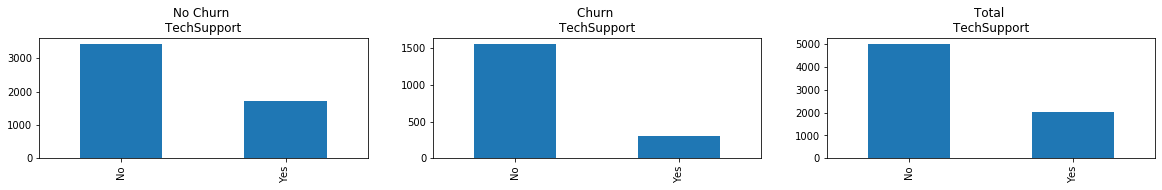

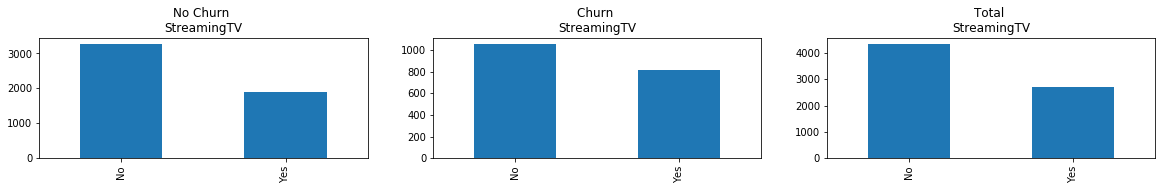

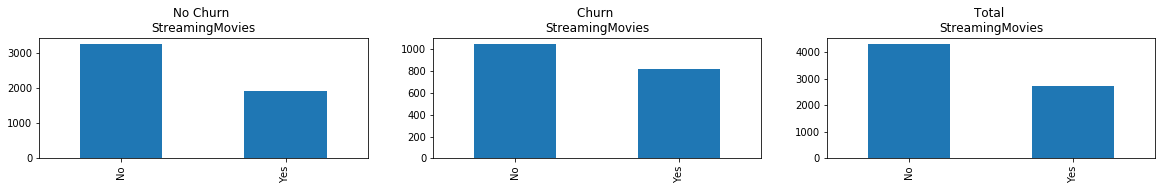

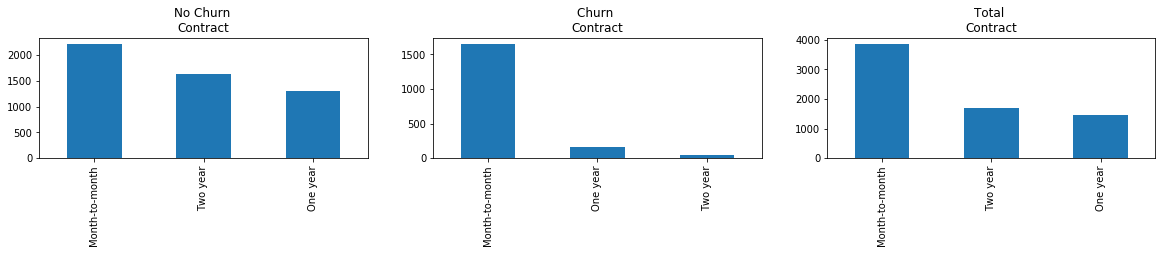

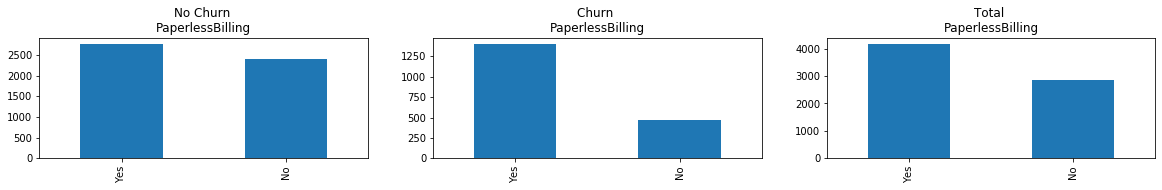

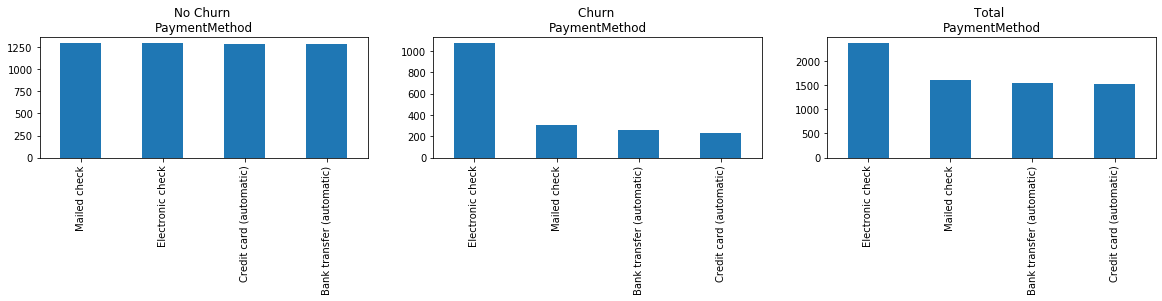

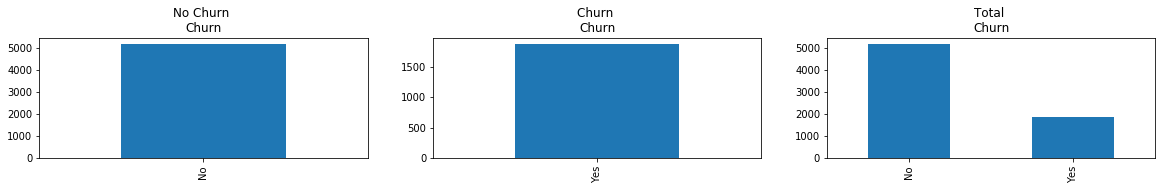

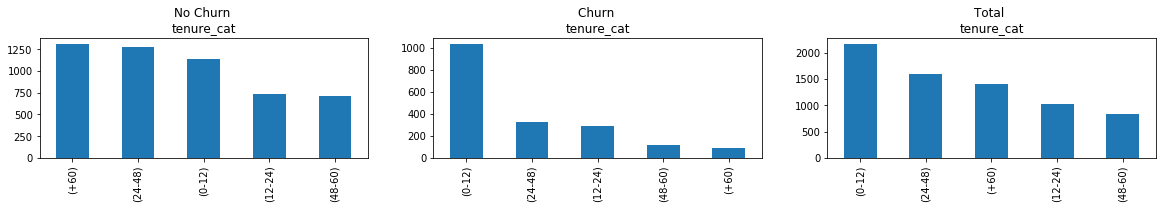

In [5]:
# Generamos una base solo con variables Categoricas
strColumns = dfChurn.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)

# Generamos un loop que nos pinte todas las graficas de las variables categoricas
for i in range(1,strColumns.shape[1]):
    
    rows = strColumns.shape[1]
    cols = 3
    plt.rcParams["figure.figsize"] = (20,50)
    
    # Generamos las graficas para No Churn
    strVarNoChurn = strColumns[strColumns["Churn"] == "No"].iloc[: ,i].value_counts()
    plt.subplot(rows,cols,(i * cols - 2))
    strVarNoChurn.plot(kind='bar')
    plt.title("No Churn \n" + strVarNoChurn.name)
    
    # Generamos las graficas para Churn
    strVarChurn = strColumns[strColumns["Churn"] == "Yes"].iloc[: ,i].value_counts()
    plt.subplot(rows,cols,(i * cols - 1))
    strVarChurn.plot(kind='bar')
    plt.title("Churn \n" + strVarChurn.name)
    
    # Generamos las graficas para Total
    strVarTot = strColumns.iloc[: ,i].value_counts()
    plt.subplot(rows,cols,(i * cols))
    strVarTot.plot(kind='bar')
    plt.title("Total \n" + strVarTot.name)

    plt.show()

#### (3.2) Analisis Exploratorio - Variables Continuas ___(NoChurn, Churn, Total)___
Generaremos una tabla descriptiva de cada un de las variables continuas cortada por No Churn vs Churn vs Total de la base

In [6]:
print('\n No Churn: \n',
      dfChurn[dfChurn["Churn"] == "No"][['tenure', 'MonthlyCharges', 'TotalCharges']].describe())
print('\n Churn: \n',
      dfChurn[dfChurn["Churn"] == "Yes"][['tenure', 'MonthlyCharges', 'TotalCharges']].describe())
print('\n Total: \n',
      dfChurn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


 No Churn: 
            tenure  MonthlyCharges  TotalCharges
count  5163.00000     5163.000000   5163.000000
mean     37.65001       61.307408   2555.344141
std      24.07694       31.094557   2329.456984
min       1.00000       18.250000     18.800000
25%      15.00000       25.100000    577.825000
50%      38.00000       64.450000   1683.600000
75%      61.00000       88.475000   4264.125000
max      72.00000      118.750000   8672.450000

 Churn: 
             tenure  MonthlyCharges  TotalCharges
count  1869.000000     1869.000000   1869.000000
mean     17.979133       74.441332   1531.796094
std      19.531123       24.666053   1890.822994
min       1.000000       18.850000     18.850000
25%       2.000000       56.150000    134.500000
50%      10.000000       79.650000    703.550000
75%      29.000000       94.200000   2331.300000
max      72.000000      118.350000   8684.800000

 Total: 
             tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.

### (4) Selección de Caracteristicas

In [7]:
# Cargamos la libreria LabelEncoder 
from sklearn.preprocessing import LabelEncoder
dfChurn.dtypes
cat_mask = (dfChurn.dtypes == object) 
cat_cols = dfChurn.columns[cat_mask].tolist() 
le = LabelEncoder()
# Aplicamos el LabelEncoder a las variables Categoricas
dfChurn[cat_cols] = dfChurn[cat_cols].apply(lambda x: le.fit_transform(x))
print(dfChurn[cat_cols].head())

   customerID  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0        5365       0              0        1           0             0   
1        3953       1              0        0           0             1   
2        2558       1              0        0           0             1   
3        5524       1              0        0           0             0   
4        6500       0              0        0           0             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             1   
1              0                0               1             0   
2              0                0               1             1   
3              1                0               1             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0        

### (5) Creación de Modelos
En este punto generaremos un set de entrenamiento (70%) y otro de prueba (30%) para poder generar nuestros modelos

In [8]:
from sklearn.model_selection import train_test_split
X = dfChurn.drop("Churn",axis=1)
y = dfChurn["Churn"]
# Usaremos un 70%, 30% para el entrenamiento y prueba delmodelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3013)

#### (5.1) Regresión Logistica
En este punto crearemos un modelo de regresión Logistica

In [9]:
from sklearn.linear_model import LogisticRegression
# Inicializamos el modelo de regresión logistica
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

/home/jorgeo80/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### (5.2) Random Forest
En este punto crearemos un modelo de Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
# Inicializamos el modelo de Random Forest
rf_cl = RandomForestClassifier(n_estimators = 25, random_state = 3013)
rf_cl.fit(X_train, y_train) 
rf_y_pred = rf_cl.predict(X_test)

#### (5.3) XGBoost
En este punto crearemos un modelo XGBoost

In [11]:
#!pip install xgboost

In [12]:
import xgboost as xgb
# Inicializamos el modelo de XGBoost
xgb_cl = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 10, seed = 3013)
xgb_cl.fit(X_train, y_train)
xgb_y_pred = xgb_cl.predict(X_test)

#### (5.4) Maquinas de Soporte Vectorial - SVM
En este punto creamos un modelo de Maquina de Soporte Vectorial

In [13]:
from sklearn.preprocessing import StandardScaler
# Generamos el modelo para estadarizar las X's
estandarizacion = StandardScaler()
estandarizacion.fit(X_train)
# Estandarizamos las X's y las guardamos en una variable transformada Z
Z_train = pd.DataFrame(estandarizacion.transform(X_train))
Z_test = pd.DataFrame(estandarizacion.transform(X_test))

In [14]:
from sklearn.svm import SVC
# Inicializamos el modelo de Maquina de Soporte Vectorial
svc = SVC(kernel='rbf', random_state = 3013)
svc.fit(Z_train, y_train)
svc_y_pred = svc.predict(Z_test)

### (6) Evaluación de Modelos

En este punto evaluaremos las metricas de los modelos, para determinar cual es el mejor.

**Accuracy:** Mide el porcentaje de casos que el modelo ha acertado.

$$Accuracy=\frac{(TP + TN)}{(TP + TN + FP + FN)}$$

**Precision:** Mide la calidad del modelo. 

$$Precision=\frac{TP}{(TP + FP)}$$

**Recall:** Informa sobre la cantidad que el modelo es capaz de identificar. 

$$Recall=\frac{TP}{(TP + FN)}$$

**F1-Score:** Compara el rendimiento combinado de la precisión y la exhaustividad.

$$F1Score=2*\frac{(Precision * Recall)}{(Precision + Recall)}$$


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns

def plot_cm(confusion_matrix, score, name):
    cts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
    per = [("{0:.2%}").format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f"\n{x1}\n{x2}\n" for x1, x2 in zip(cts, per)]
    labels = np.asarray(labels).reshape(2, 2)
    classNames = ['Churn','No Churn']
    tick_marks = np.arange(0,3)
    annot_kws = {"size": 12, "ha": 'center',"va": 'center'}
    plt.figure(figsize = (6,3))
    sns.heatmap(confusion_matrix, annot = labels, fmt = "",
                cmap = 'Blues', cbar = False,  annot_kws = annot_kws, color='black')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title((name + '\nAcc Score: {0}'.format(round(score, 3))+'\n'))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    return plt.show()

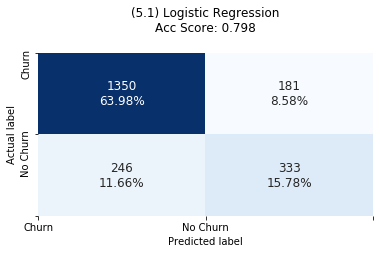

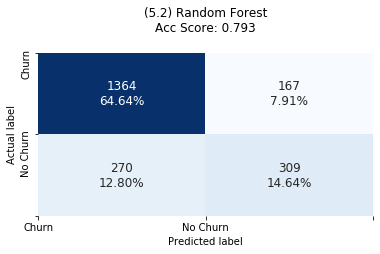

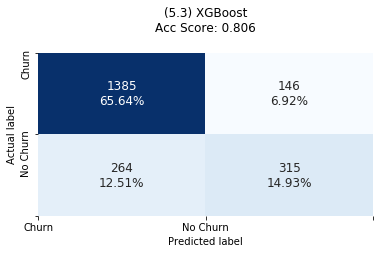

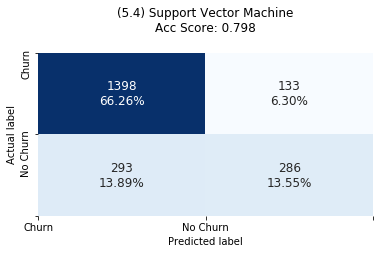

In [18]:
parameters = {'models':[lr_y_pred, rf_y_pred, xgb_y_pred, svc_y_pred],
              'names':['(5.1) Logistic Regression', '(5.2) Random Forest', 
                       '(5.3) XGBoost', '(5.4) Support Vector Machine']}

for i in range(0,4):
    cm = confusion_matrix(y_test, parameters['models'][i])
    score = accuracy_score(y_test, parameters['models'][i])
    plot_cm(cm, score, parameters['names'][i])
    plt.show()    


In [19]:
model_performances = pd.DataFrame()
for i in range(0,4):
    df = pd.DataFrame({"Model"           : [parameters['names'][i]],
                       "Accuracy_score"  : [accuracy_score(y_test, parameters['models'][i])],
                       "Recall_score"    : [recall_score(y_test, parameters['models'][i])],
                       "Precision"       : [precision_score(y_test, parameters['models'][i])],
                       "f1_score"        : [f1_score(y_test, parameters['models'][i])]
                      })
    model_performances  = pd.concat([model_performances, df])
model_performances.reset_index(drop=True)

,Model,Accuracy_score,Recall_score,Precision,f1_score
0,(5.1) Logistic Regression,0.797630,0.575130,0.647860,0.609332
1,(5.2) Random Forest,0.792891,0.533679,0.649160,0.585782
2,(5.3) XGBoost,0.805687,0.544041,0.683297,0.605769
3,(5.4) Support Vector Machine,0.798104,0.493955,0.682578,0.573146


Dado el desempeño de los siguientes indicadores, podriamos decir que el mejor modelo seria el (5.3) XGBoost

### (7) Referencias
* [Telecom Customer Churn Prediction Notebook](https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction)
* [Notas Clase 5 - Regresión Logística](https://github.com/jorgeo80/UP_MCD/blob/master/MachineLearning/S5.3-RegLogistica.ipynb)
* [Notas Clase 6 - Suport Vector Machine](https://github.com/jorgeo80/UP_MCD/blob/master/MachineLearning/S6-SVM.ipynb)